<a href="https://colab.research.google.com/github/jbarcenilla21/APRENDIZAJE_AUTOMATICO_23_24/blob/main/P3EJ2MD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB03.- EJERCICIO 1**

Este proyecto aborda la importante tarea de clasificar lesiones de cáncer de mama como benignas o malignas basándose en características derivadas de diagnósticos médicos. Utilizando un conjunto de datos que incluye mediciones como el perímetro, la suavidad, y la concavidad de las lesiones, hemos desarrollado y evaluado modelos de minería de datos para mejorar la precisión y fiabilidad del diagnóstico. El objetivo es asistir a los profesionales médicos proporcionando una herramienta que pueda predecir la malignidad de las lesiones de mama con alta precisión y así mejorar los resultados para los pacientes mediante diagnósticos más tempranos y precisos.

# Paso 1: Importar Librerías y Cargar Datos

El primer fragmento de código se encarga de importar todas las librerías necesarias para el proyecto y cargar el conjunto de datos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.tree import _tree
from sklearn.tree import plot_tree
import graphviz
from subprocess import call
from IPython.display import Image
# Cargar el archivo CSV
file_path = 'cancer.csv'
dataset = pd.read_csv(file_path, header=0) # header=0 indica que la primera línea contiene los nombres de las columnas

# Mostrar las primeras filas para verificar que se haya cargado correctamente
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

# Paso 2: Preprocesamiento de Datos y Análisis de Correlación

Este paso es crucial para entender cómo las variables están relacionadas entre sí y cómo pueden influir en la variable objetivo. El principal objetivo de este apartado es observar la matriz de correlación para eliminar variables que aporten información irrelevante.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

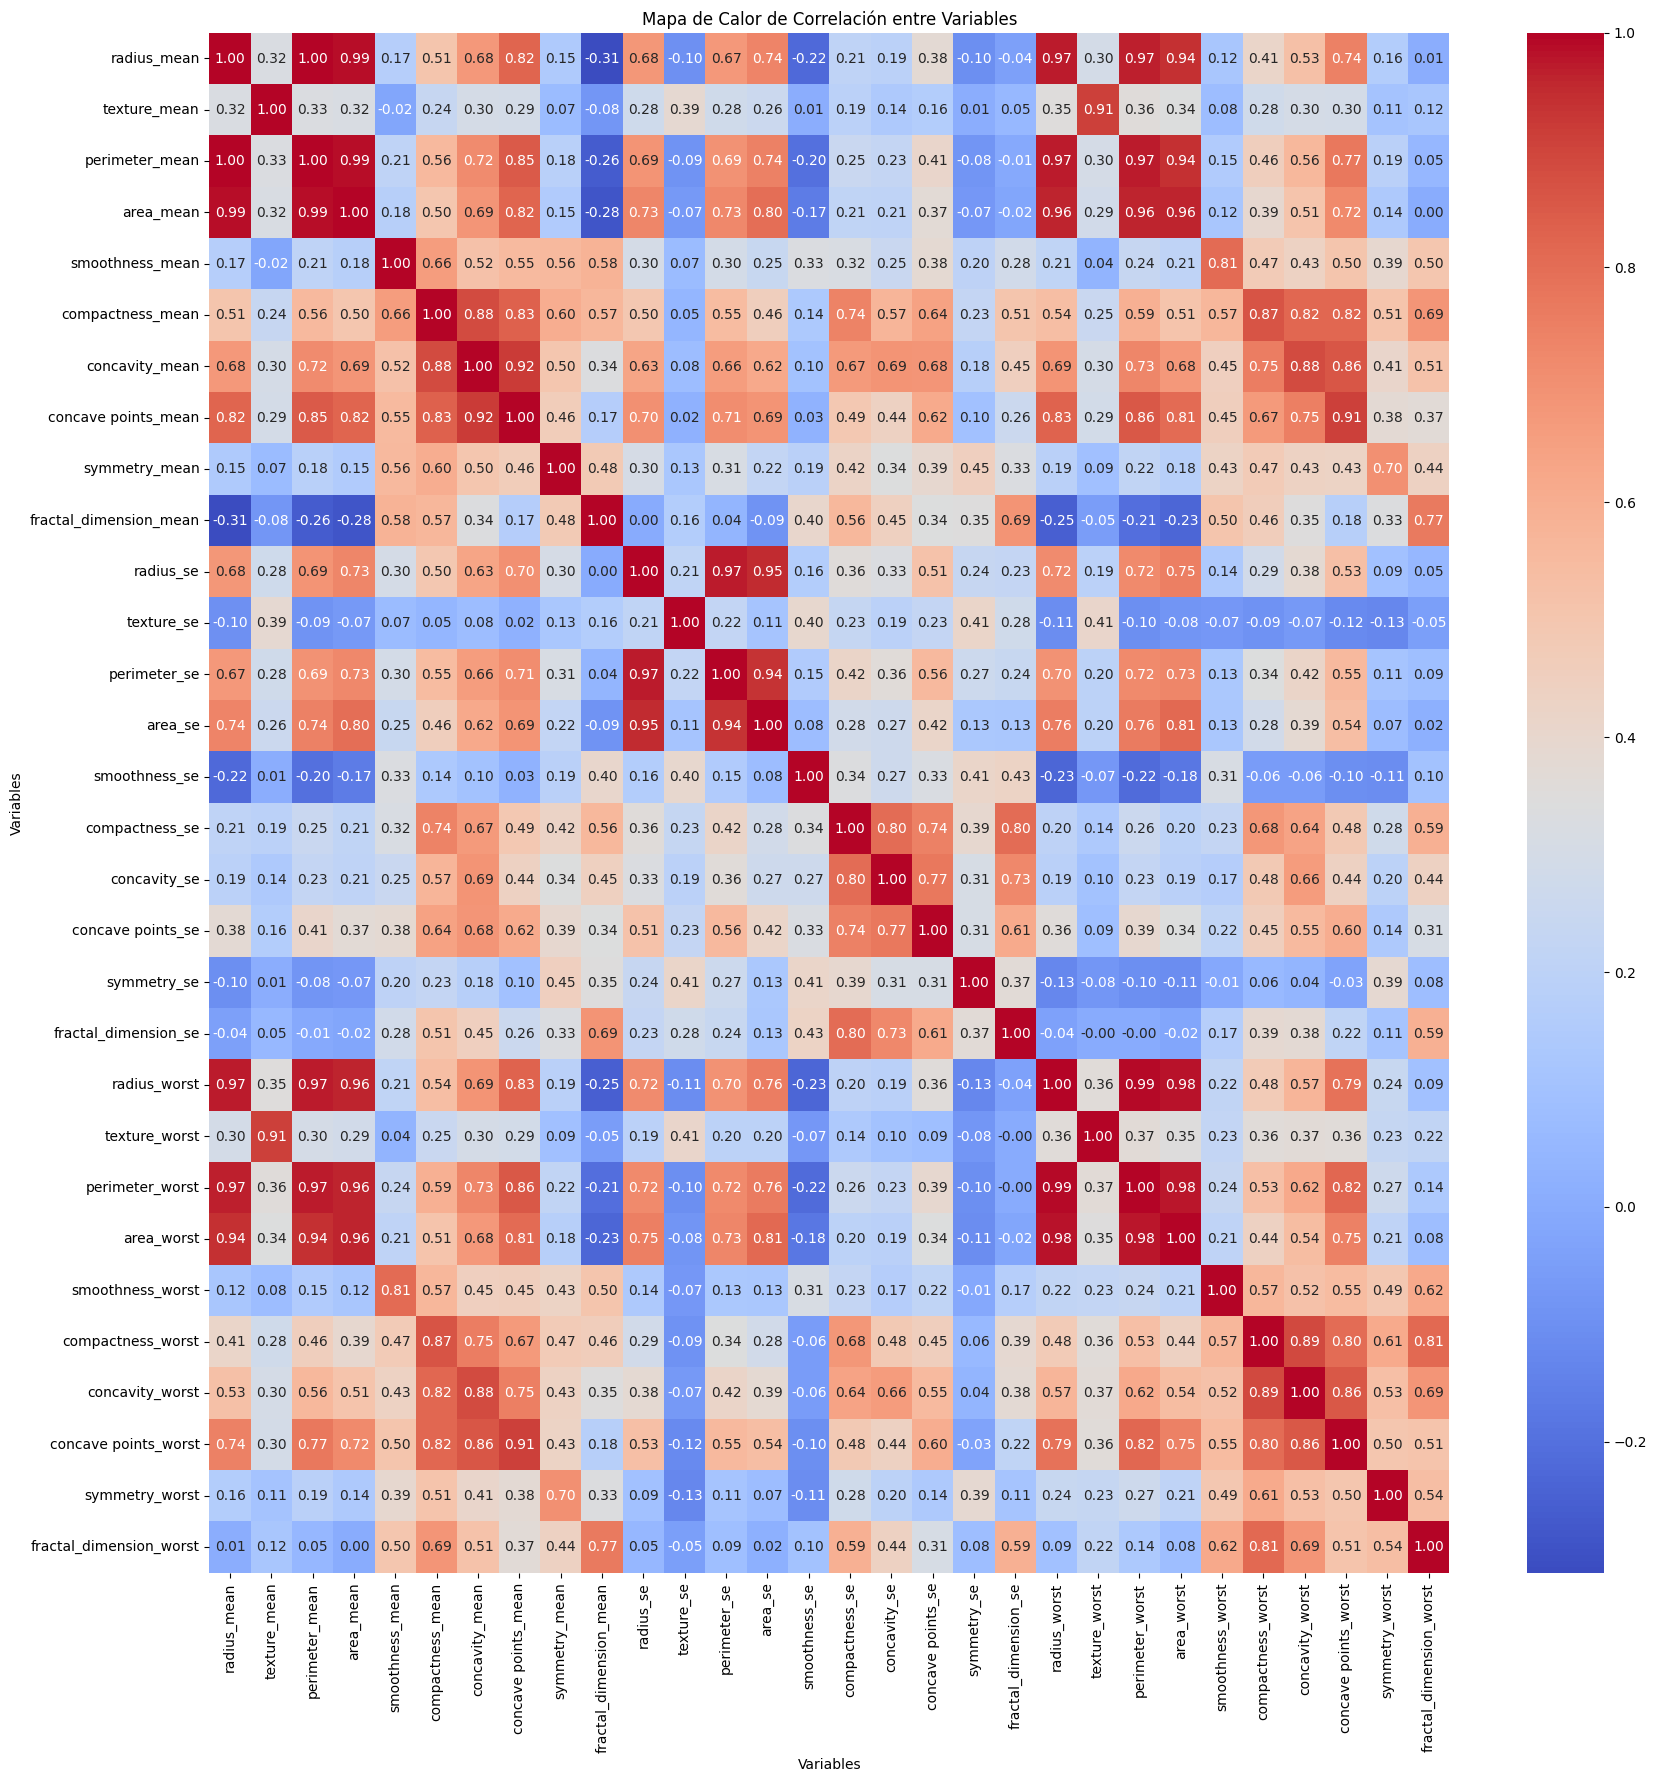

In [ ]:
# Mostramos información básica sobre el dataset para identificar tipos de datos y valores nulos
print(dataset.info())

# Convertimos todas las columnas, excepto las dos primeras, a numéricas
for column in dataset.columns[2:]:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

# Convertimos la columna 'diagnosis' en valores numéricos
label_encoder = LabelEncoder()
dataset['diagnosis'] = label_encoder.fit_transform(dataset['diagnosis']) # el valor 0 se sustituye por tumor benigneo y el valor 1 por maligno.

# Verificamos la conversión y los tipos de datos
print(dataset.dtypes)

# Eliminamos columnas innecesarias
dataset = dataset.drop(columns=['id'])
dataset = dataset.drop(columns=['Unnamed: 32'])

# Calculamos la matriz de correlación entre las variables numéricas
numeric_dataset = dataset.iloc[:, 1:]  # Excluir la columna 'diagnosis' de la matriz de correlación, ya que es la variable objetivo
correlation_matrix = numeric_dataset.corr()


# Mostramos la matriz de correlación
print("\nMatriz de correlación:")
print(correlation_matrix)

# Creamos un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Calor de Correlación entre Variables")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

Podemos observar que hay variables altamente correlacionadas entre ellas. Ahora eliminaremos las que menos nos aporten información para nuestra variable objetivo y que tengan un alto coeficiente de correlación. Para ello hacemos lo siguiente:

In [ ]:
# Establecemos un umbral de correlación
correlation_threshold = 0.9

# Encontramos columnas altamente correlacionadas
highly_correlated_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_with = correlation_matrix.columns[j]
            highly_correlated_pairs.add((colname, correlated_with))

# Decidimos qué columnas eliminar basándose en la correlación con 'diagnosis'
columns_to_remove = set()
for col1, col2 in highly_correlated_pairs:
    # Calculamos la correlación con la variable objetivo
    corr_col1 = dataset[col1].corr(dataset['diagnosis'])
    corr_col2 = dataset[col2].corr(dataset['diagnosis'])
    # Eliminamos la columna con menor correlación con 'diagnosis'
    if abs(corr_col1) < abs(corr_col2):
        columns_to_remove.add(col1)
    else:
        columns_to_remove.add(col2)

# Eliminamos las columnas seleccionadas del dataset
dataset_reduced = dataset.drop(columns=list(columns_to_remove))

# Mostramos las columnas eliminadas y las primeras filas del dataset reducido
print(f"Columnas eliminadas: {columns_to_remove}")
print(dataset_reduced.head())


Columnas eliminadas: {'concavity_mean', 'texture_mean', 'area_worst', 'radius_worst', 'perimeter_se', 'perimeter_mean', 'area_se', 'radius_mean', 'concave points_mean', 'area_mean'}
   diagnosis  smoothness_mean  compactness_mean  symmetry_mean  \
0          1          0.11840           0.27760         0.2419   
1          1          0.08474           0.07864         0.1812   
2          1          0.10960           0.15990         0.2069   
3          1          0.14250           0.28390         0.2597   
4          1          0.10030           0.13280         0.1809   

   fractal_dimension_mean  radius_se  texture_se  smoothness_se  \
0                 0.07871     1.0950      0.9053       0.006399   
1                 0.05667     0.5435      0.7339       0.005225   
2                 0.05999     0.7456      0.7869       0.006150   
3                 0.09744     0.4956      1.1560       0.009110   
4                 0.05883     0.7572      0.7813       0.011490   

   compactness_se 

Este código intenta conservar al menos una medición para cada tipo de característica importante antes de la categorización. De esta forma, mantenemos la integridad de los datos y respetamos los requisitos del laboratorio de categorizar estas mediciones.

In [ ]:

# Variable real a categorizar (elegir la primera que no haya sido eliminada)
real_features_to_categorize = []

for feature_group in possible_features_to_categorize.values():
    for feature in feature_group:
        if feature in dataset.columns:
            real_features_to_categorize.append(feature)
            break  # Romper el bucle una vez que encontremos la primera característica no eliminada

# Categorizamos las variables seleccionadas
for feature in real_features_to_categorize:
    dataset[feature + '_cat'] = pd.qcut(dataset[feature], 3, labels=False)
    dataset.drop(columns=[feature], inplace=True)

dataset.head()


diagnosis  texture_mean  perimeter_mean  smoothness_mean  concavity_mean  \
0          1         10.38          122.80          0.11840          0.3001   
1          1         17.77          132.90          0.08474          0.0869   
2          1         21.25          130.00          0.10960          0.1974   
3          1         20.38           77.58          0.14250          0.2414   
4          1         14.34          135.10          0.10030          0.1980   

   concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0              0.14710         0.2419                 0.07871     1.0950   
1              0.07017         0.1812                 0.05667     0.5435   
2              0.12790         0.2069                 0.05999     0.7456   
3              0.10520         0.2597                 0.09744     0.4956   
4              0.10430         0.1809                 0.05883     0.7572   

   texture_se  ...  area_worst  smoothness_worst  compactness_worst  \
0      0.9053  ...      2019.0            0.1622             0.6656   
1      0.7339  ...      1956.0            0.1238             0.1866   
2      0.7869  ...      1709.0            0.1444             0.4245   
3      1.1560  ...       567.7            0.2098             0.8663   
4      0.7813  ...      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  radius_mean_cat  area_mean_cat  \
0                  0.11890                2              2   
1                  0.08902                2              2   
2                  0.08758                2              2   
3                  0.17300                0              0   
4                  0.07678                2              2   

   compactness_mean_cat  
0                     2  
1                     1  
2                     2  
3                     2  
4                     2  

[5 rows x 31 columns]

# Paso 3) Elección y creación del modelo

En este fragmento de código hacemos lo siguiente:

**Imputación de Datos:** Antes de entrenar los modelos de aprendizaje automático, es importante manejar los valores faltantes. Usamos un método llamado imputación, donde reemplazamos los valores faltantes con la media de la columna correspondiente. Esto nos permite mantener datos completos, lo cual es esencial para el entrenamiento de los modelos.

**División del Dataset**: Separamos nuestro conjunto de datos en dos partes: una para entrenar nuestro modelo (X_train y y_train) y otra para probar su rendimiento (X_test y y_test). Esto se hace para evaluar qué tan bien generaliza el modelo a datos no vistos, un aspecto fundamental para comprender la efectividad del modelo.

**Entrenamiento de Modelos:** Entrenamos dos tipos de modelos de clasificación, un DecisionTreeClassifier y un RandomForestClassifier. El primero es un árbol de decisión simple que utiliza el criterio 'gini' o 'entropía' para decidir cómo dividir los datos en cada paso. El segundo es un conjunto de árboles de decisión que trabaja en conjunto para producir una predicción más robusta y generalmente más precisa.

**Evaluación de la Importancia de Características:** Utilizamos RandomForestClassifier para evaluar qué características (como el radio o la textura de un tumor) son las más importantes cuando se trata de predecir si el cáncer es benigno o maligno. Esto nos da una perspectiva sobre cuáles son los factores más relevantes en los diagnósticos de cáncer de mama.

**Evaluación de Modelos:** Generamos informes de clasificación que nos dan varias métricas, como precisión, recall y puntuación F1, para cada modelo. Estas métricas nos ayudan a comprender la eficacia de nuestros modelos y a identificar dónde pueden necesitar mejoras.

In [ ]:
# Dividimos el dataset en características (X) y la variable objetivo (y)
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un imputador que reemplazará cada valor NaN con la media de esa columna
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Ajustamos el imputador en el conjunto de entrenamiento y transformarlo
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Entrenamos un Random Forest Classifier y obtener la importancia de las características
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_imputed, y_train)
feature_importances = rf.feature_importances_
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print("Importancia de las características con Random Forest:\n", features)

# Entrenamos y evaluamos un árbol de decisión con el criterio 'gini'
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train_imputed, y_train)
predictions_gini = dt_gini.predict(X_test_imputed)
print("\n Decision Tree con criterio 'gini':", classification_report(y_test, predictions_gini))

# Entrenamos y evaluamos un árbol de decisión con el criterio 'entropy'
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_imputed, y_train)
predictions_entropy = dt_entropy.predict(X_test_imputed)
print("\n Decision Tree con criterio 'entropy':", classification_report(y_test, predictions_entropy))

# Evaluamos nuevamente el Random Forest ya entrenado
predictions_rf = rf.predict(X_test_imputed)

Importancia de las características con Random Forest:
                     Feature  Importance
19          perimeter_worst    0.150156
17             radius_worst    0.104453
4       concave points_mean    0.097743
24     concave points_worst    0.090603
20               area_worst    0.075204
3            concavity_mean    0.071158
1            perimeter_mean    0.070603
23          concavity_worst    0.059445
10                  area_se    0.049514
27          radius_mean_cat    0.040952
18            texture_worst    0.020799
28            area_mean_cat    0.020128
21         smoothness_worst    0.015257
0              texture_mean    0.015027
29     compactness_mean_cat    0.014600
25           symmetry_worst    0.011621
22        compactness_worst    0.010636
7                 radius_se    0.010425
26  fractal_dimension_worst    0.008560
13             concavity_se    0.007465
2           smoothness_mean    0.007045
12           compactness_se    0.006997
6    fractal_dimension_me

**Elección del modelo**

Basándonos en estas métricas, el modelo de árbol de decisión con criterio 'entropy' tiene un rendimiento ligeramente superior con una precisión media ponderada de 0.95 frente a 0.93 del modelo 'gini'. El modelo 'entropy' también tiene una mejor puntuación F1 para la clase 1, que es la clase que predice los casos malignos. Dado que en aplicaciones médicas es crítico identificar correctamente los casos malignos (clase 1), una mayor puntuación F1 para la clase 1 puede ser preferible.

El recall extremadamente alto (0.99) para la clase 0 en el modelo 'entropy' sugiere que es muy bueno identificando los casos benignos, pero esto viene con una precisión ligeramente menor (0.93) en comparación con el modelo 'gini' (0.96), lo cual es una diferencia menor.

Por tanto, vamos a elegir el modelo 'entropy' por su mayor capacidad para identificar correctamente los casos malignos (alto F1-Score para la clase 1) y su sólida capacidad para identificar los casos benignos (alto recall para la clase 0), lo cual es particularmente importante en un contexto médico donde los falsos negativos (no detectar un caso maligno) pueden tener consecuencias graves.

A contuación dibujaremos los modelos creados anteriormente.

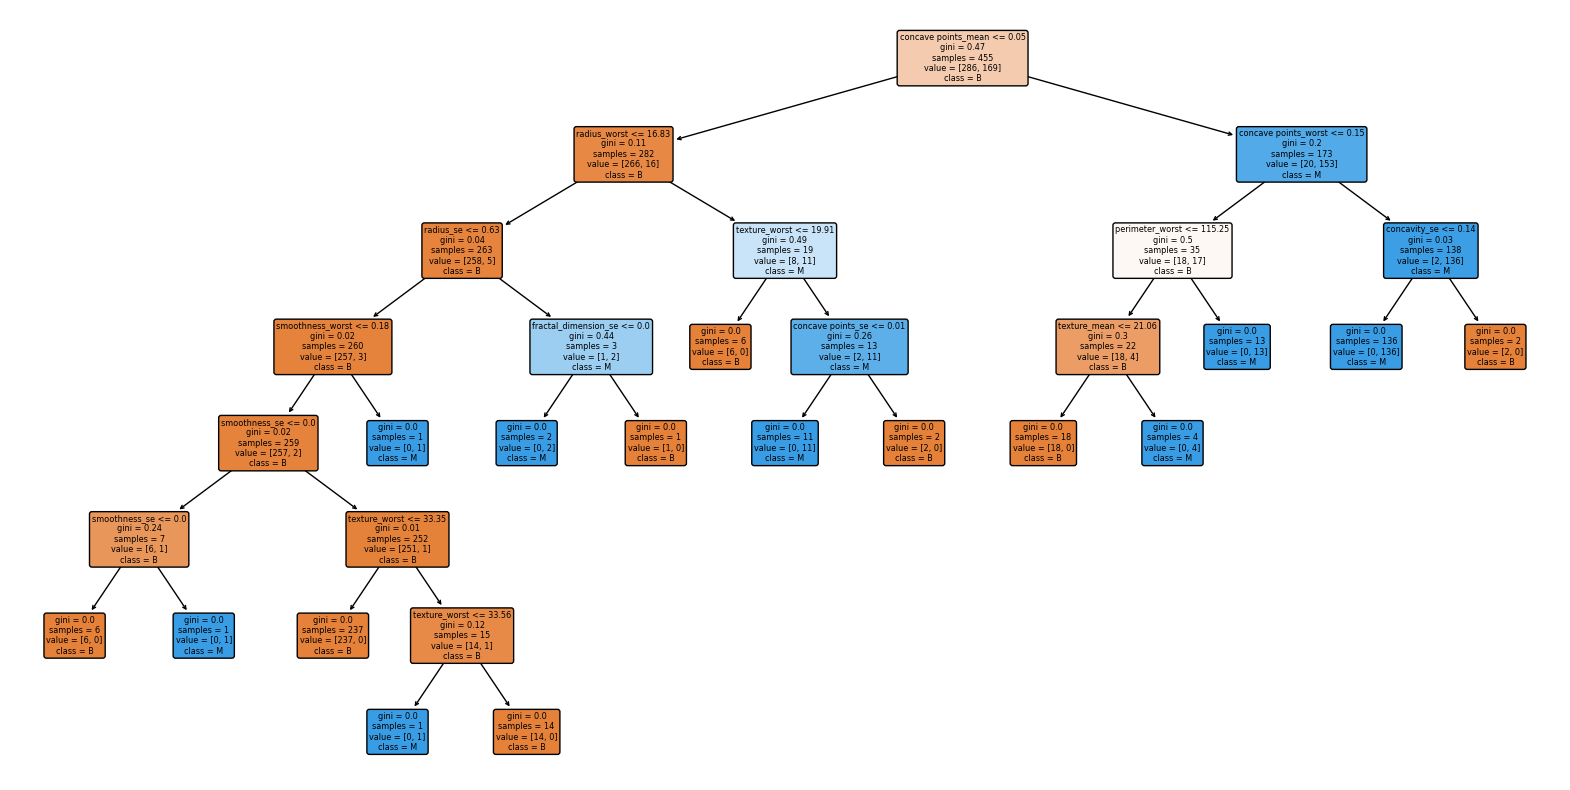

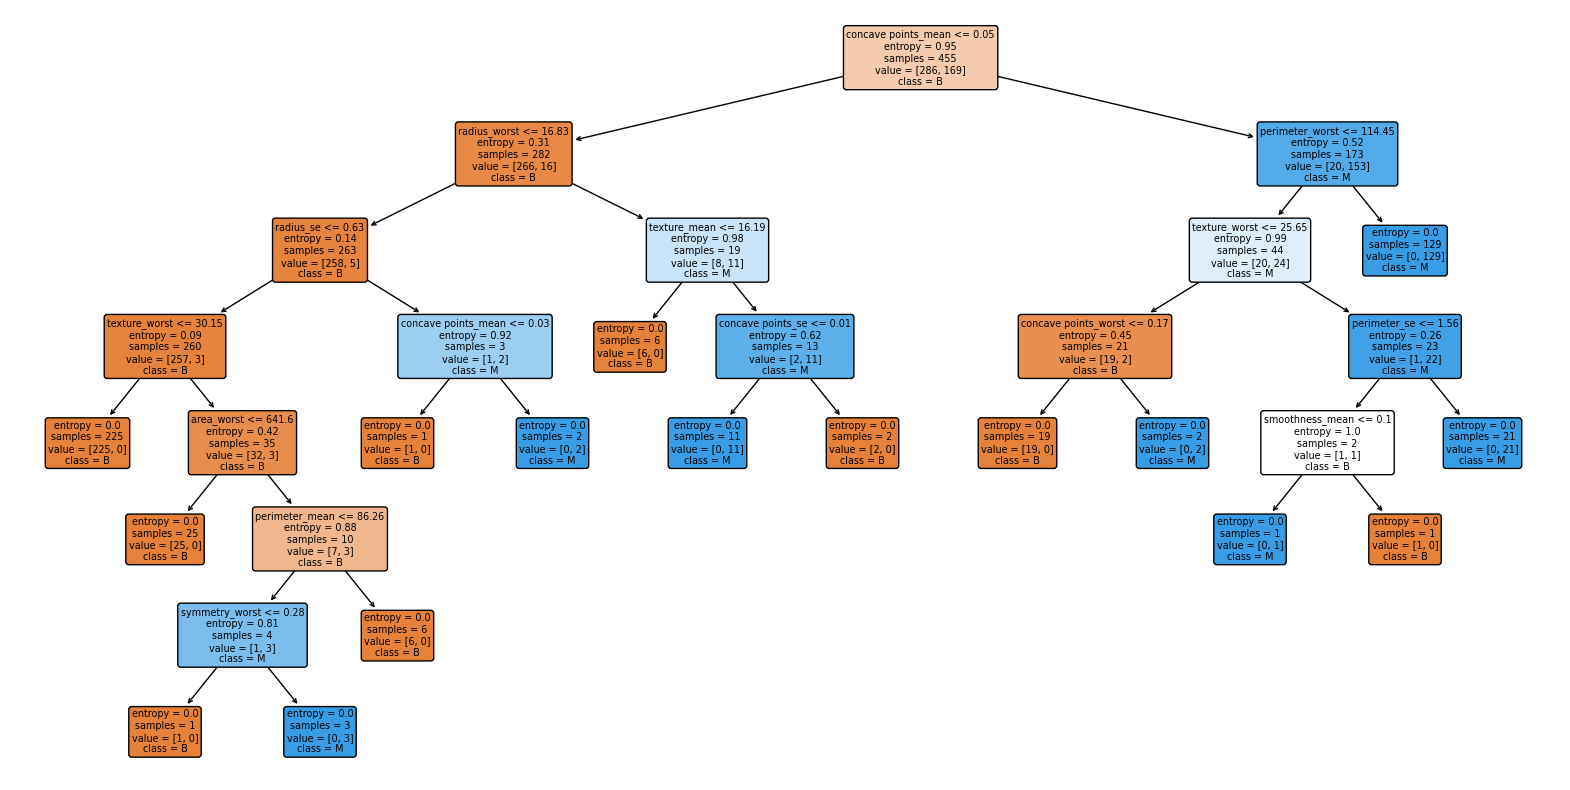

In [ ]:
#  Dibuja los modelos elegidos en el punto anterior.
# Para el árbol de decisión con criterio 'gini'
export_graphviz(dt_gini, out_file='tree_gini.dot',
                feature_names=X.columns,
                class_names=label_encoder.classes_,
                rounded=True, proportion=False,
                precision=2, filled=True)

call(['dot', '-Tpng', 'tree_gini.dot', '-o', 'tree_gini.png', '-Gdpi=600'])
Image(filename='tree_gini.png')

# Para el árbol de decisión con criterio 'entropy'
export_graphviz(dt_entropy, out_file='tree_entropy.dot',
                feature_names=X.columns,
                class_names=label_encoder.classes_,
                rounded=True, proportion=False,
                precision=2, filled=True)

call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])
Image(filename='tree_entropy.png')

# Visualizar el árbol de decisión con criterio 'gini'
plt.figure(figsize=(20,10))
plot_tree(dt_gini, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True, proportion=False, precision=2)
plt.show()

# Visualizar el árbol de decisión con criterio 'entropy'
plt.figure(figsize=(20,10))
plot_tree(dt_entropy, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True, proportion=False, precision=2)
plt.show()

Este fragmento de código define y utiliza una función, print_decision_rules, que está diseñada para imprimir de forma recursiva las reglas de un árbol de decisión de scikit-learn. La función recorre el árbol desde la raíz hasta las hojas, imprimiendo la regla en cada nodo interno y la clase de predicción en cada nodo hoja.

In [ ]:
# Función para imprimir reglas de el árbol de decisión con el criterio gini y entropy
def print_decision_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("Decision tree structure:")

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}If {name} <= {threshold:.2f}")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}Predict class {tree_.value[node]}")

    recurse(0, 1)

print_decision_rules(dt_gini, X_train.columns)

print_decision_rules(dt_entropy, X_train.columns)


Decision tree structure:
  If concave points_mean <= 0.05
    If radius_worst <= 16.83
      If radius_se <= 0.63
        If smoothness_worst <= 0.18
          If smoothness_se <= 0.00
            If smoothness_se <= 0.00
              Predict class [[6. 0.]]
            else:  # if smoothness_se > 0.00
              Predict class [[0. 1.]]
          else:  # if smoothness_se > 0.00
            If texture_worst <= 33.35
              Predict class [[237.   0.]]
            else:  # if texture_worst > 33.35
              If texture_worst <= 33.56
                Predict class [[0. 1.]]
              else:  # if texture_worst > 33.56
                Predict class [[14.  0.]]
        else:  # if smoothness_worst > 0.18
          Predict class [[0. 1.]]
      else:  # if radius_se > 0.63
        If fractal_dimension_se <= 0.00
          Predict class [[0. 2.]]
        else:  # if fractal_dimension_se > 0.00
          Predict class [[1. 0.]]
    else:  # if radius_worst > 16.83
      If tex

Estas reglas representan los criterios que el árbol utiliza para tomar decisiones de clasificación.
El árbol de decisión ha generado una serie de reglas basadas en diferentes características del tumor, como la media de puntos cóncavos (concave points_mean), el peor radio (radius_worst), y otros. Cada regla puede verse como una pregunta con una respuesta de 'sí' o 'no' que nos lleva por diferentes caminos en el árbol. Al final de cada camino, llegamos a una predicción que nos dice si el modelo cree que un tumor es benigno (clase 0) o maligno (clase 1), basado en las respuestas a las preguntas del árbol.

Por ejemplo, una ruta en el árbol indica que si el valor medio de los puntos cóncavos de un tumor es menor o igual a 0.05, y si el peor radio es menor o igual a 16.83, el árbol tiende a clasificar el tumor como benigno, a menos que otras condiciones posteriores lo clasifiquen como maligno. Estas reglas son útiles para entender qué características y qué valores están jugando roles importantes en las decisiones del modelo de clasificación.

# Paso 4) Selección de reglas (específicas y generales)

Reglas Específicas (generalizan lo menos posible):

- Si concave points_mean > 0.05 y perimeter_worst > 114.45, entonces predecimos la clase con 129 casos de la clase 1 (maligno). Esta es una regla específica porque ha pasado por varias divisiones antes de llegar a una conclusión.
- Si concave points_mean <= 0.05, radius_worst > 16.83, texture_mean > 16.19, y concave points_se > 0.01, entonces predecimos la clase con 2 casos de la clase 0 (benigno). Esta es otra regla específica debido a la cantidad de condiciones que se deben cumplir.

Reglas Generales (especializan lo menos posible):

- Si concave points_mean <= 0.05, entonces el árbol continúa dividiendo, pero esta primera división es bastante general y aplica a muchos casos en el conjunto de datos.
- Si concave points_mean > 0.05, nuevamente, esta es una división temprana en el árbol y es una regla que afecta a una gran proporción del conjunto de datos.

Consideramos que la estructura para sacar las reglas es demasiado grande, por lo tanto, repetiremos el proceso para un 10% de los datos.

In [ ]:
# Usando un subconjunto del 10% de los datos para hacer que el árbol sea más pequeño y fácil de interpretar
X_small, _, y_small, _ = train_test_split(X, y, test_size=0.9, random_state=42)

# Entrenando el árbol de decisión sobre el subconjunto de datos
dt_small = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_small.fit(X_small, y_small)

# Imprimiendo las reglas del árbol más pequeño
print_decision_rules(dt_small, X_small.columns)


Decision tree structure:
  If concave points_mean <= 0.05
    If perimeter_worst <= 113.95
      Predict class [[35.  0.]]
    else:  # if perimeter_worst > 113.95
      If perimeter_mean <= 106.69
        Predict class [[0. 1.]]
      else:  # if perimeter_mean > 106.69
        Predict class [[1. 0.]]
  else:  # if concave points_mean > 0.05
    If perimeter_se <= 1.37
      Predict class [[1. 0.]]
    else:  # if perimeter_se > 1.37
      Predict class [[ 0. 18.]]


# Paso 5) Usar nuestro clasificador para clasificar 5 individuos que no se hayan usado.

In [ ]:
# Obtenemos los nombres de las columnas del conjunto de entrenamiento
feature_names = X_train.columns.tolist()
print(feature_names)

# Creamos un DataFrame con valores simulados
data = {
    'texture_mean': [15, 20, 25, 20, 30],
    'perimeter_mean': [75, 85, 150, 130, 180],
    'smoothness_mean': [0.1, 0.1, 0.2, 0.15, 0.25],
    'concavity_mean': [0.01, 0.01, 0.3, 0.25, 0.4],
    'concave points_mean': [0.01, 0.01, 0.15, 0.12, 0.2],
    'symmetry_mean': [0.2, 0.18, 0.22, 0.2, 0.25],
    'fractal_dimension_mean': [0.06, 0.06, 0.07, 0.07, 0.08],
    'radius_se': [0.3, 0.25, 0.4, 0.35, 0.5],
    'texture_se': [1, 1, 1.5, 1.2, 2],
    'perimeter_se': [3, 2.5, 5, 4, 6],
    'area_se': [25, 25, 45, 35, 55],
    'smoothness_se': [0.005, 0.006, 0.011, 0.01, 0.015],
    'compactness_se': [0.015, 0.02, 0.07, 0.05, 0.09],
    'concavity_se': [0.015, 0.02, 0.05, 0.04, 0.06],
    'concave points_se': [0.01, 0.01, 0.02, 0.015, 0.03],
    'symmetry_se': [0.02, 0.02, 0.03, 0.025, 0.035],
    'fractal_dimension_se': [0.0035, 0.0035, 0.005, 0.0045, 0.006],
    'radius_worst': [14, 14, 25, 23, 28],
    'texture_worst': [20, 20, 30, 28, 35],
    'perimeter_worst': [90, 90, 180, 160, 200],
    'area_worst': [550, 550, 1200, 1000, 1400],
    'smoothness_worst': [0.1, 0.1, 0.22, 0.18, 0.26],
    'compactness_worst': [0.2, 0.2, 0.35, 0.3, 0.4],
    'concavity_worst': [0.1, 0.1, 0.4, 0.35, 0.5],
    'concave points_worst': [0.05, 0.05, 0.2, 0.18, 0.25],
    'symmetry_worst': [0.3, 0.3, 0.3, 0.28, 0.35],
    'fractal_dimension_worst': [0.07, 0.07, 0.1, 0.09, 0.12],
    'radius_mean_cat': [1, 1, 2, 2, 0],
    'area_mean_cat': [1, 1, 2, 2, 0],
    'compactness_mean_cat': [1, 1, 2, 2, 0]
}

new_individuals = pd.DataFrame(data)

# Usando el modelo para hacer predicciones
new_predictions = dt_small.predict(new_individuals)

# Mostramos las predicciones
for i, pred in enumerate(new_predictions):
    print(f"Individuo {i + 1}: {'Benigno' if pred == 0 else 'Maligno'}")



['texture_mean', 'perimeter_mean', 'smoothness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'radius_mean_cat', 'area_mean_cat', 'compactness_mean_cat']
Individuo 1: Benigno
Individuo 2: Benigno
Individuo 3: Maligno
Individuo 4: Maligno
Individuo 5: Maligno


Para crear estos individuos, consideraremos las características clave que hemos identificado y les asignaremos valores que simulen diferentes escenarios de diagnóstico.

- **Individuo 1 - Caso típicamente benigno**:
Valores bajos para características asociadas con malignidad como concave points_mean, perimeter_worst.
- **Individuo 2 - Caso limítrofe benigno**:
Valores cercanos al límite superior para características benignas y algunos valores más altos en características que podrían sugerir malignidad.
- **Individuo 3 - Caso típicamente maligno**:
Valores altos en perimeter_worst, concave points_mean, que son indicativos de tumores malignos.
- **Individuo 4 - Caso limítrofe maligno**:
Valores mixtos donde algunas características son altas y otras bajas, simulando un caso que podría ser difícil de diagnosticar.
- **Individuo 5 - Caso atípico maligno**:
Valores extremadamente altos en todas las características principales asociadas con malignidad.

4. Práctica 2 (TCGA)
Objetivo (2 puntos)
TCGA (The Cancer Genome Atlas) es un proyecto colaborativo dirigido por el Instituto Nacional del Cáncer
(NCI) y el Instituto Nacional de Investigación del Genoma Humano (NHGRI) en los Estados Unidos. Su objetivo
principal es caracterizar exhaustivamente las alteraciones genómicas en el cáncer mediante el análisis de
grandes conjuntos de datos de pacientes con cáncer. Se pretende crear un clasificador de cáncer que tenga
en cuenta las probabilidades de pertenecer a una clase dependiendo de las distintas variables y sus valores.
Usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.
1) Realiza todo el preprocesamiento necesario para poder entrenar el clasificador con datos
categóricos (en el caso de transformaciones de datos continuos se usarán los cuartiles creados por
el diagrama de tallos y hojas). Muestra las distintas tablas de distribución. (1 punto)
Data Mining
LAB 03 Ordinaria
Técnicas y modelos de clasificación
2
2) Crea el clasificador e indica su error. Úsalo para saber a qué clase corresponden al menos 10
clientes que no hayas usado para entrenar los modelos. (1 punto)

# PRÁCTICA 2

**Importamos librerías**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report

**Abrimos el archivo**

In [ ]:
import pandas as pd

# Carga el archivo CSV directamente desde el espacio de trabajo de Colab
df = pd.read_csv('/content/TCGA.csv')
print(data.head())  # Muestra las primeras líneas para confirmar la carga correcta

  Grade   Project       Case_ID  Gender   Age_at_diagnosis  \
0   LGG  TCGA-LGG  TCGA-DU-8164    Male  51 years 108 days   
1   LGG  TCGA-LGG  TCGA-QH-A6CY    Male  38 years 261 days   
2   LGG  TCGA-LGG  TCGA-HW-A5KM    Male   35 years 62 days   
3   LGG  TCGA-LGG  TCGA-E1-A7YE  Female  32 years 283 days   
4   LGG  TCGA-LGG  TCGA-S9-A6WG    Male  31 years 187 days   

         Primary_Diagnosis   Race     IDH1         TP53         ATRX  ...  \
0   Oligodendroglioma, NOS  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
1             Mixed glioma  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
2         Astrocytoma, NOS  white  MUTATED      MUTATED      MUTATED  ...   
3  Astrocytoma, anaplastic  white  MUTATED      MUTATED      MUTATED  ...   
4  Astrocytoma, anaplastic  white  MUTATED      MUTATED      MUTATED  ...   

         FUBP1          RB1       NOTCH1         BCOR        CSMD3  \
0      MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
1  NOT_MUTATED  NOT_MUTA

limpieza de los datos:


**- Valores faltantes**

In [ ]:
# Crear imputadores
num_imputer = SimpleImputer(strategy='mean')  # Para variables numéricas
cat_imputer = SimpleImputer(strategy='most_frequent')  # Para variables categóricas

**-Convertir a categóricos**

Usaremos OneHotEncoder para convertir variables categóricas:

In [ ]:
# One-hot encoding para variables categóricas
cat_encoder = OneHotEncoder(handle_unknown='ignore')

**-normalizar datos numéricos:**
Usaremos StandardScaler para normalizar las variables numéricas:

In [ ]:

num_scaler = StandardScaler()

**Convertimos "Age_at_diagnosis** a numérica

In [ ]:
# Convertir "Age_at_diagnosis" a una columna numérica extrayendo el número de años
df['Age_at_diagnosis'] = df['Age_at_diagnosis'].str.extract(r'(\d+)').astype(float)


**Identificar columnas numéricas y categóricas**

In [ ]:
# Identificar las columnas numéricas y categóricas
numeric_features = ['Age_at_diagnosis']
categorical_features = df.select_dtypes(include=['object']).drop(['Case_ID'], axis=1).columns.tolist()

**Creamos el procesador**

In [ ]:
# Crear transformadores para las columnas numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Crear el preprocesador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocesar los datos
df_preprocessed = preprocessor.fit_transform(df.drop(['Case_ID'], axis=1))


**Selección variable objetivo**

Grade parece ser un buen candidato para la variable objetivo, ya que podría referirse a la gravedad o etapa del cáncer, que es un resultado típico de interés en los estudios de oncología.

In [ ]:

# Primero separamos las características y la variable objetivo
X = df_preprocessed
y = df['Grade'].values

Dividir los datos y entrenar el modelo

In [ ]:
# Dividir los datos en entrenamiento y prueba, dejando de lado las 10 muestras para predecir al final
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=10, random_state=42)
# Las 10 muestras para predecir al final
X_to_predict = X_temp
y_actual = y_temp

Creo modelo con SVC

In [ ]:
# Crear un modelo de clasificador, en este caso, SVC
model = SVC(kernel='linear')

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         GBM       1.00      1.00      1.00        76
         LGG       1.00      1.00      1.00        97

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



Cada clase tiene una precisión, recuperación y puntuación f1 de 1.00, lo que indica que el modelo ha clasificado perfectamente el conjunto de datos de prueba. El "soporte" es el número de ocurrencias reales de la clase en el conjunto de datos especificado; 76 para GBM y 97 para LGG.

Las métricas de "macro avg" y "weighted avg" también muestran puntuaciones perfectas y reflejan el promedio no ponderado y ponderado respectivamente para las métricas de precisión, recuperación y puntuación f1 sobre las clases.

La métrica de "accuracy" para el conjunto de datos de prueba también es 1.00, lo que indica un desempeño perfecto.

**Apartado a) Hacer diagramas**

In [ ]:
# Ahora calculamos los cuartiles para la columna de interés, por ejemplo, 'Age_at_diagnosis'
quartiles = df['Age_at_diagnosis'].quantile([0.25, 0.5, 0.75])
print(quartiles)  # Esto muestra los cuartiles





0.25    38.0
0.50    51.0
0.75    62.0
Name: Age_at_diagnosis, dtype: float64


Binarizo "Age_at_diagnodis"

In [ ]:
# Utiliza los cuartiles para binarizar 'Age_at_diagnosis'
df['Age_at_diagnosis_binned'] = pd.cut(df['Age_at_diagnosis'], bins=[df['Age_at_diagnosis'].min(), quartiles[0.25], quartiles[0.5], quartiles[0.75], df['Age_at_diagnosis'].max()], labels=['Q1', 'Q2', 'Q3', 'Q4'], include_lowest=True)

# Muestra las tablas de distribución para las columnas categóricas
for column in categorical_features:
    print(df[column].value_counts())

Grade
LGG    499
GBM    363
Name: count, dtype: int64
Project
TCGA-LGG    499
TCGA-GBM    363
Name: count, dtype: int64
Gender
Male      499
Female    359
--          4
Name: count, dtype: int64
Primary_Diagnosis
Glioblastoma                     360
Astrocytoma, anaplastic          129
Mixed glioma                     128
Oligodendroglioma, NOS           108
Oligodendroglioma, anaplastic     75
Astrocytoma, NOS                  58
--                                 4
Name: count, dtype: int64
Race
white                               766
black or african american            59
not reported                         18
asian                                14
--                                    4
american indian or alaska native      1
Name: count, dtype: int64
IDH1
NOT_MUTATED    448
MUTATED        414
Name: count, dtype: int64
TP53
NOT_MUTATED    508
MUTATED        354
Name: count, dtype: int64
ATRX
NOT_MUTATED    642
MUTATED        220
Name: count, dtype: int64
PTEN
NOT_MUTATED    718


Apartado b )Evaluamos el modelo

In [ ]:
# Luego de entrenar el modelo, evalúalo
accuracy = model.score(X_test, y_test)
error = 1 - accuracy
print(f'Error del clasificador: {error}')



Error del clasificador: 0.0


Añadimos 10 individuos

In [ ]:
# Y finalmente, predecir las clases de las 10 muestras
# Las 10 muestras para predecir al final
X_to_predict = X_temp
y_actual = y_temp
predicted_classes = model.predict(X_to_predict)
print(predicted_classes)

['GBM' 'GBM' 'LGG' 'LGG' 'LGG' 'GBM' 'GBM' 'LGG' 'GBM' 'GBM']


# Práctica 3

En la Universidad Francisco de Vitoria se quieren trazas de comunicación de la red para encontrar distintos
malwares. Dicho clasificador funcionará mediante un set de entrenamiento donde se buscará un plano que
divida las diferentes clases dispuesta en un espacio n-dimensional dependiendo de sus características.

Para ello usaremos el dataset “Malware”. Elige el clasificador que más se adapte de entre los vistos en clase
y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

1) Crea un clasificador, realiza al menos tres configuraciones y dibuja una tabla donde se muestre la
precisión con la que clasifican. ¿Cómo funcionaría si no usamos kernels? ¿Y al usar distintos
kernels? (1 punto)

2) Elige 10 imágenes que no hayas usado ni para entrenar el modelo, ni para evaluarlo y clasifícalas.
Usa para ello el modelo que mejor clasifique de los del punto anterior. Índica con que error o
acierto ha funcionado el clasificador. (1 punto)

In [ ]:
import numpy as np
import os
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import random
import shutil
from sklearn.svm import SVC
import datetime

# Apartado 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def extract_features(image_path):
    try:
        with Image.open(image_path) as img:
            img = img.convert('RGB').resize((128, 128))
            histogram = np.array(img.histogram())
        return histogram
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

En este codigo se realiza una extracción del histograma de colores de las imagenes dadas y convertirlos en un arrray lo que nos sirve para reconocer las características de la imagen y poder estudiarlas y clasificar las imágenes

In [ ]:
carpeta = '/content/drive/MyDrive/Malware'
subfolders = ['Agent.FYI', 'Fakerean', 'Lolyda.AA1', 'Yuner.A']
all_images = {}

for folder_name in subfolders:
    subfolder_path = os.path.join(carpeta, folder_name)
    images = [os.path.join(subfolder_path, f) for f in os.listdir(subfolder_path)
              if os.path.isfile(os.path.join(subfolder_path, f))]
    all_images[folder_name] = images

selected_images = random.sample([img for sublist in all_images.values() for img in sublist], 10)

selected_folder = '/content/drive/MyDrive/selected_images'
remaining_folder = '/content/drive/MyDrive/remaining_images'

if os.path.exists(selected_folder):
    shutil.rmtree(selected_folder)
if os.path.exists(remaining_folder):
    shutil.rmtree(remaining_folder)

os.makedirs(selected_folder, exist_ok=True)
os.makedirs(remaining_folder, exist_ok=True)

for image in selected_images:
    shutil.copy(image, os.path.join(selected_folder, os.path.basename(image)))

for folder_name, images in all_images.items():
    subfolder_path = os.path.join(remaining_folder, folder_name)
    os.makedirs(subfolder_path, exist_ok=True)
    for image in images:
        if image not in selected_images:
            shutil.copy(image, os.path.join(subfolder_path, os.path.basename(image)))

print(f"Imágenes seleccionadas copiadas a: {selected_folder}")
print(f"Imágenes restantes copiadas a: {remaining_folder}")



Imágenes seleccionadas copiadas a: /content/drive/MyDrive/selected_images
Imágenes restantes copiadas a: /content/drive/MyDrive/remaining_images


A lo largo del código visto anteriormente se extraen todas las imágenes de la carpeta dada llamada Malware y se seleccionan aleatoriamente 10 imágenes las cuales usaremos posteriormente para clasificar. Seguidamente, se crean 2 nuevas carpetas, una de ellas tendrá las 10 imagenes escogidas aleatoriamente mientras que la otra tendrá el resto de imágenes de la carpeta Malware la cual usaremos para entrenar nuestro modelo.

In [ ]:
features = []
labels = []

for folder_name in subfolders:
    subfolder_path = os.path.join(remaining_folder, folder_name)
    for file_name in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, file_name)
        if os.path.isfile(file_path):
            feature = extract_features(file_path)
            if feature is not None:
                features.append(feature)
                labels.append(folder_name)

features = np.array(features)
labels = np.array(labels)

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C': [1, 10, 100], 'gamma': ['scale', 'auto']}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5, scoring='accuracy', return_train_score=False)

clf.fit(features_scaled, labels)

results = pd.DataFrame(clf.cv_results_)
display_columns = ['param_kernel', 'param_C', 'param_gamma', 'mean_test_score', 'rank_test_score']
display(results.loc[:, display_columns].sort_values('rank_test_score'))

best_params = clf.best_params_
best_score = clf.best_score_
print("Mejores parámetros encontrados:", best_params)
print("Mejor precisión encontrada:", best_score)

param_kernel param_C param_gamma  mean_test_score  rank_test_score
0        linear       1       scale         0.997802                1
15       linear     100        auto         0.997802                1
14         poly     100       scale         0.997802                1
13          rbf     100       scale         0.997802                1
12       linear     100       scale         0.997802                1
11         poly      10        auto         0.997802                1
10          rbf      10        auto         0.997802                1
9        linear      10        auto         0.997802                1
8          poly      10       scale         0.997802                1
7           rbf      10       scale         0.997802                1
6        linear      10       scale         0.997802                1
5          poly       1        auto         0.997802                1
4           rbf       1        auto         0.997802                1
3        linear       1        auto         0.997802                1
2          poly       1       scale         0.997802                1
1           rbf       1       scale         0.997802                1
16          rbf     100        auto         0.997802                1
17         poly     100        auto         0.997802                1

Mejores parámetros encontrados: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Mejor precisión encontrada: 0.9978021978021978


Según la tabla, todas las combinaciones de parámetros que se probaron han dado como resultado la misma precisión media en las pruebas (mean_test_score de 0.997802). Esto sugiere que, para este conjunto de datos y dentro del rango de parámetros probados, la elección del kernel, el valor de C y el gamma no tienen un impacto diferencial significativo en el rendimiento del modelo.

Dado que todas las combinaciones tienen un rank_test_score de 1, esto significa que todas están compartiendo la posición más alta en términos de precisión. En tales casos, otros factores como la simplicidad del modelo, el tiempo de entrenamiento y la interpretación pueden ser considerados para elegir la mejor configuración.

Aunque los puntajes de precisión son idénticos en este caso, en una situación práctica real podrías querer explorar si realmente hay una diferencia en el rendimiento entre los modelos usando otras métricas, como la matriz de confusión, F1-score, recall, precisión, o mediante una validación cruzada más detallada o un conjunto de pruebas independiente.

SVM sin uso de kernel (kernel lineal):
Cuando no se utiliza un kernel específico o se usa un kernel lineal, el SVM intentará encontrar el hiperplano óptimo que separa las clases de manera lineal. Esto funciona bien cuando los datos son linealmente separables o casi linealmente separables.

Sin embargo, si los datos tienen una estructura más compleja que no se puede separar con un hiperplano lineal, el rendimiento del modelo puede no ser óptimo. En tal caso, se podría observar una precisión más baja, menor capacidad de generalización o sobreajuste a los datos de entrenamiento.

SVM usando distintos kernels:

Kernel Polinómico: Este kernel permite al modelo ajustarse a relaciones más complejas, transformando los datos a un espacio polinómico donde pueden volverse linealmente separables. Es útil cuando la relación entre las características y las etiquetas es de naturaleza no lineal.

Kernel RBF: El kernel RBF puede mapear entradas en un espacio dimensional infinito, ofreciendo una gran flexibilidad para separar los datos en clases.

In [ ]:

best_model = clf.best_estimator_
scores = cross_val_score(best_model, features_scaled, labels, cv=5)

print("Precisión promedio con CV:", scores.mean())
print("Desviación estándar en CV:", scores.std())


Precisión promedio con CV: 0.9978021978021978
Desviación estándar en CV: 0.00439560439560438


# Apartado 2

In [ ]:
imagenes_prueba = '/content/drive/My Drive/selected_images'

test_images_paths = [os.path.join(imagenes_prueba, f) for f in os.listdir(imagenes_prueba)
                     if f.lower().endswith('.png') and os.path.isfile(os.path.join(imagenes_prueba, f))]


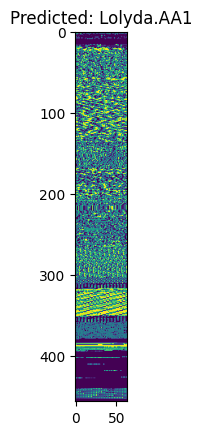

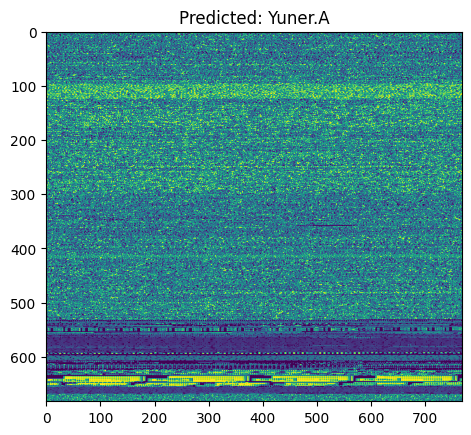

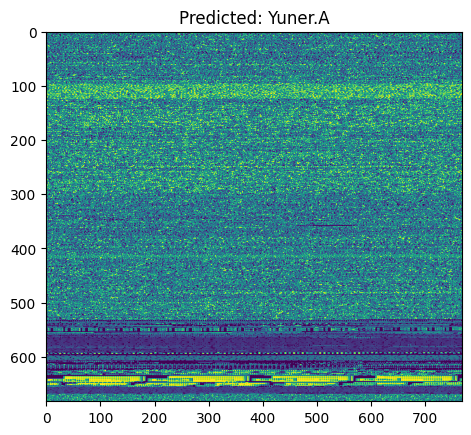

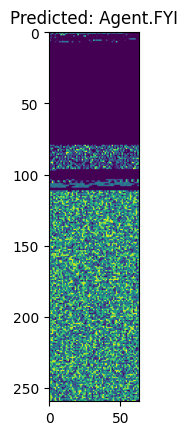

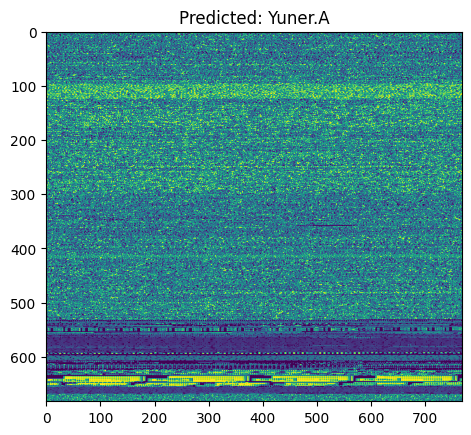

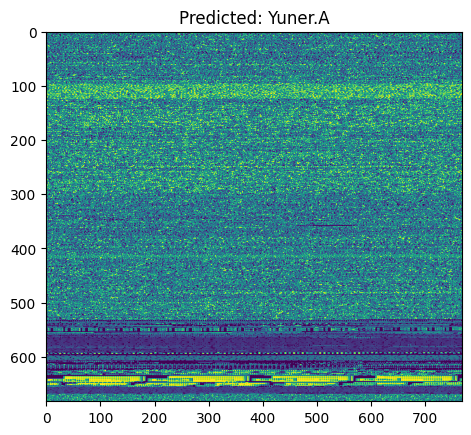

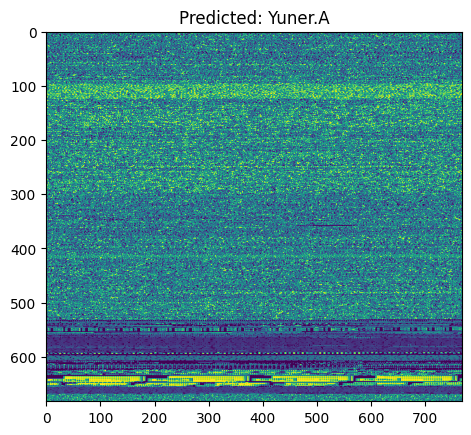

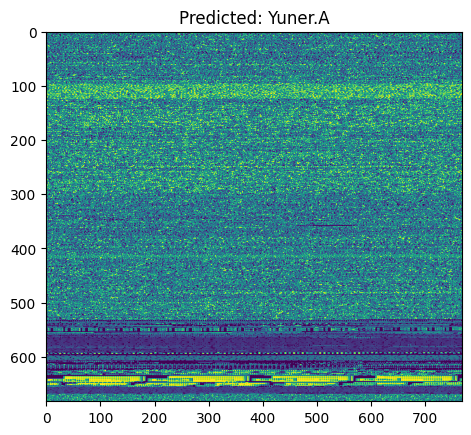

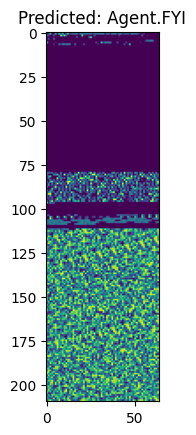

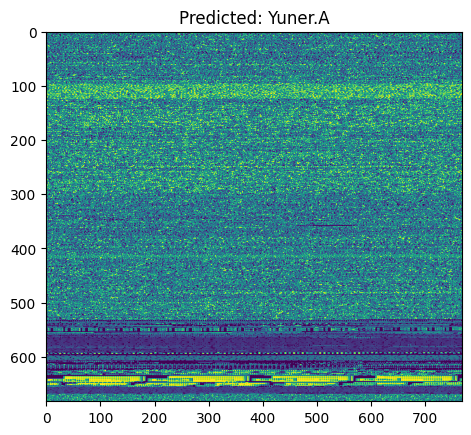

In [ ]:

if len(test_images_paths) == 10:
    test_features = [extract_features(img_path) for img_path in test_images_paths]
    test_features = np.array(test_features)

    test_features_scaled = scaler.transform(test_features)
    test_predictions = clf.best_estimator_.predict(test_features_scaled)

    for img_path, prediction in zip(test_images_paths, test_predictions):
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f'Predicción: {prediction}')
        plt.show()
else:
    print("Error: El número de imágenes de prueba no es igual a 10. Revise el contenido de la carpeta.")

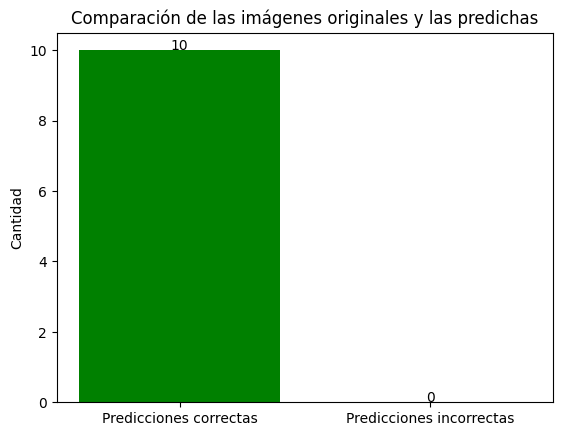

Total de predicciones correctas: 10 de 10


In [ ]:
test_features = [extract_features(img_path) for img_path in selected_images]
test_features = np.array(test_features)
test_features_scaled = scaler.transform(test_features)
test_predictions = best_model.predict(test_features_scaled)


original_labels = [os.path.basename(os.path.dirname(img_path)) for img_path in selected_images]

matches = [original == predicted for original, predicted in zip(original_labels, test_predictions)]

correct_predictions_count = sum(matches)
incorrect_predictions_count = len(matches) - correct_predictions_count

labels = ['Predicciones correctas', 'Predicciones incorrectas']

counts = [correct_predictions_count, incorrect_predictions_count]

plt.bar(labels, counts, color=['green', 'red'])

plt.title('Comparación de las imágenes originales y las predichas')
plt.xlabel('')
plt.ylabel('Cantidad')

for i in range(len(counts)):
    plt.text(i, counts[i], str(counts[i]), ha='center')

plt.show()

print(f"Total de predicciones correctas: {correct_predictions} de {len(selected_images)}")

Como pódemos comprobas todas las imágenes que se han predicho coon nuestro clasificador han resultado correctas una vez han sido comparadas con su tipo de imagen original. Esto nos demuestra que la precisión obtenida por nuestro clasificador a la hora de entrenarlo es correcta.

# PRÁCTICA 4 Diagnóstico de cáncer con genes

# Librerías y funciones:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

El fichero “genes.csv” contiene información de dos genes y la posibilidad de tener cáncer o no. Con todo ello se quiere crear un modelo que permita hacer un diagnóstico para un nuevo paciente teniendo en cuenta su similitud en un campo de n-dimensiones.

Elige el clasificador que más se adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

1) Haz todo el preprocesamiento para crear un set de entrenamiento, otro de validación y uno de test qué permita hacer un diagnóstico lo mas preciso posible aplicando las estrategias pertinentes.

2) Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir la cercanía de esa nueva instancia con el resto. ¿Qué decisiones has tomado? ¿Por qué?

3) Elige la mejor configuración entre las anteriores. Para ello dibuja una tabla ver cómo evoluciona la clasificación. Dibuja los resultados que se obtienen con la mejor configuración y los distintos hiperparametros del punto anterior para ver su evolución.

4) Utiliza el clasificador para saber que ocurre con los datos de un del dataset de test “pacientes_test.csv” que obtendremos del dataset proporcionado.

## 1)
Carga de la base de datos

In [ ]:
df4 = pd.read_csv('genes.csv')
df4

Gene1  Gene2  CancerPresent
0       4.3    3.9              1
1       2.5    6.3              0
2       5.7    3.9              1
3       6.1    6.2              0
4       7.4    3.4              1
...     ...    ...            ...
2995    5.0    6.5              1
2996    3.4    6.6              0
2997    2.7    6.5              0
2998    3.3    5.6              0
2999    4.6    8.2              0

[3000 rows x 3 columns]

Primero se realiza un filtrado, y comprobamos si hay duplicados.

In [ ]:
cantidad_nan = df4.isnull().sum()
print(cantidad_nan)

# Borramos los valores duplicados
cantidad_duplicados = df4.duplicated().sum()
cantidad_duplicados
df4 = df4.drop_duplicates()

Gene1            0
Gene2            0
CancerPresent    0
dtype: int64


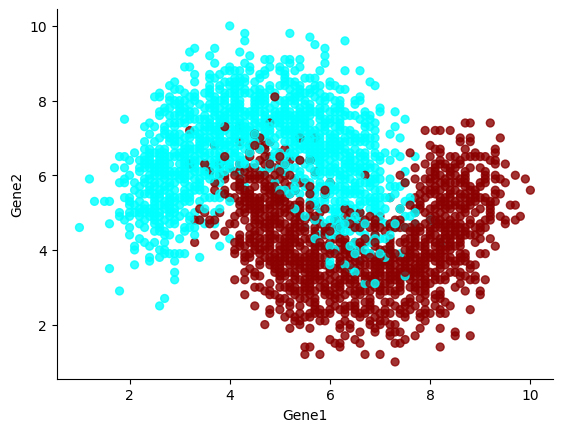

In [ ]:
# Colores basados en la columna CancerPresent
colors = df4['CancerPresent'].map({0: 'cyan', 1: 'darkred'})

df4.plot(kind='scatter', x='Gene1', y='Gene2', s=32, alpha=.8, c=colors)
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.show()

In [ ]:
# Normalización de las características
normal = StandardScaler()
dt_normalizados = normal.fit_transform(df4[['Gene1', 'Gene2']])
print(dt_normalizados)

[[-0.69418969 -0.86046105]
 [-1.6625526   0.51144267]
 [ 0.05898146 -0.86046105]
 ...
 [-1.55495672  0.62576798]
 [-1.23216908  0.11130409]
 [-0.53279587  1.59753312]]


In [ ]:
# Preparación de los dos datos (de prueba y de test)

X = dt_normalizados
y = df4['CancerPresent']

# División de los datos

# División inicial en entrenamiento (60%) y temporal (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# División del conjunto temporal en validación (20% del total) y prueba (20% del total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

cantidad_nan, X_train.shape, X_val.shape, X_test.shape

(Gene1            0
 Gene2            0
 CancerPresent    0
 dtype: int64,
 (1282, 2),
 (428, 2),
 (428, 2))

## 2)
Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde  al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir la cercanía de esa nueva instancia con el resto. ¿Qué decisiones has tomado? ¿Por qué?

n_n: El número de vecinos considerados para clasificar una nueva instancia se define con este parámetro.

metric: Este parámetro especifica la métrica de distancia utilizada para calcular la proximidad entre las instancias.

Realizaremos una búsqueda de hiperparámetros para encontrar la mejor combinación de estos dos. Probaremos diferentes valores para n_neighbors para examinar cómo influye en el rendimiento del modelo el número de vecinos. Respecto a la métrica de distancia, exploraremos opciones comunes como euclidean (euclidiana), manhattan (taxicab o city block) y minkowski (una generalización de las dos anteriores que puede ajustarse para replicarlas).

### Decisiones y Razonamiento:
n_n: Explorar un rango de valores nos permite comprender cómo la complejidad del modelo (en términos de cuántos vecinos considera) influye en su capacidad para generalizar desde el conjunto de entrenamiento hasta el conjunto de validación y prueba. Un valor demasiado bajo puede conducir a un sobreajuste del modelo que no generaliza bien, mientras que un valor demasiado alto puede resultar en un modelo infraajustado que no captura adecuadamente las complejidades de los datos.

metric: La elección de la métrica de distancia determina cómo se calcula la "cercanía" entre las instancias. Diferentes métricas pueden ser más apropiadas para diferentes tipos y estructuras de datos. Por ejemplo, la distancia euclidiana es adecuada para espacios vectoriales uniformes, mientras que la distancia de Manhattan puede ser preferible en contextos donde las diferencias en una dimensión son independientes de las diferencias en otra. Implementaremos una búsqueda de cuadrícula para evaluar varias combinaciones de estos dos parámetros y determinar cuál ofrece el mejor rendimiento en función de la precisión del modelo en el conjunto de validación.

In [ ]:
n=len(df4)
n=n/2
n = int(n)

### Realizacion del algoritmo de k-vecinos más cercanos
a nuestro dataset, 3 veces por cada nº de vecinos considerado

In [ ]:
# Definir el rango de valores para n_neighbors
n_n_range = range(1, n)

# Inicializar variables para almacenar los 10 mejores resultados
top_5_scores = []
top_5_params = []

# Configurar y ejecutar la búsqueda de cuadrícula con validación cruzada para cada valor de n_neighbors
for n_n in n_n_range:
    param_grid = {
        'n_neighbors': [n_n],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Obtener los mejores parámetros y la mejor puntuación
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Guardar los resultados si son uno de los 5 mejores
    if len(top_5_scores) < 5:
        top_5_scores.append(best_score)
        top_5_params.append(best_params)
    else:
        min_score_index = top_5_scores.index(min(top_5_scores))
        if best_score > top_5_scores[min_score_index]:
            top_5_scores[min_score_index] = best_score
            top_5_params[min_score_index] = best_params

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan 

In [ ]:
# Observamos los mejores 5 resultados
for i in range(len(top_5_scores)):
    print(f"Top {i+1}: Score={top_5_scores[i]}, Params={top_5_params[i]}")

Top 1: Score=0.9141962548638134, Params={'metric': 'euclidean', 'n_neighbors': 75}
Top 2: Score=0.9134180447470819, Params={'metric': 'manhattan', 'n_neighbors': 72}
Top 3: Score=0.9141932149805448, Params={'metric': 'euclidean', 'n_neighbors': 53}
Top 4: Score=0.9134180447470819, Params={'metric': 'manhattan', 'n_neighbors': 63}
Top 5: Score=0.9134150048638133, Params={'metric': 'euclidean', 'n_neighbors': 73}


## 3)
Elige la mejor configuración entre las anteriores. Para ello dibuja una tabla ver cómo evoluciona la clasificación. Dibuja los resultados que se obtienen con la mejor configuración y los distintos hiperparametros del punto anterior para ver su evolución.

Buscamos la mejor configuración de las calculadas anteriormente

In [ ]:
best_score = max(top_5_scores)
score_to_find = best_score
# Búsqueda del índice de top_5_scores
index_of_score = top_5_scores.index(score_to_find)
# Obtenemos los datos asociados a ese índice
params_for_score = top_5_params[index_of_score]
# Imprimir los datos asociados
print("La puntuación más alta de las calculadas anteriormente es::", best_score)
print("Para la puntuación", score_to_find, "parámetros:", params_for_score)

La puntuación más alta de las calculadas anteriormente es:: 0.9141962548638134
Para la puntuación 0.9141962548638134 parámetros: {'metric': 'euclidean', 'n_neighbors': 75}


Tabla (Para visualizarla la visualizamos en un dataframe)

In [ ]:
# Ordenar la lista top_5_scores de mayor a menor
top_5_scores_sorted = sorted(top_5_scores, reverse=True)

# Crear un diccionario con los datos
data = {
    "Top": list(range(1, len(top_5_scores_sorted) + 1)),
    "Score": top_5_scores_sorted,
    "Metric": [params['metric'] for params in top_5_params],
    "n_neighbors": [params['n_neighbors'] for params in top_5_params]
}

# Convertir el diccionario en un DataFrame
df_aux = pd.DataFrame(data)

# Imprimir el DataFrame
print(df_aux)

   Top     Score     Metric  n_neighbors
0    1  0.914196  euclidean           75
1    2  0.914193  manhattan           72
2    3  0.913418  euclidean           53
3    4  0.913418  manhattan           63
4    5  0.913415  euclidean           73


Entrenamiento final

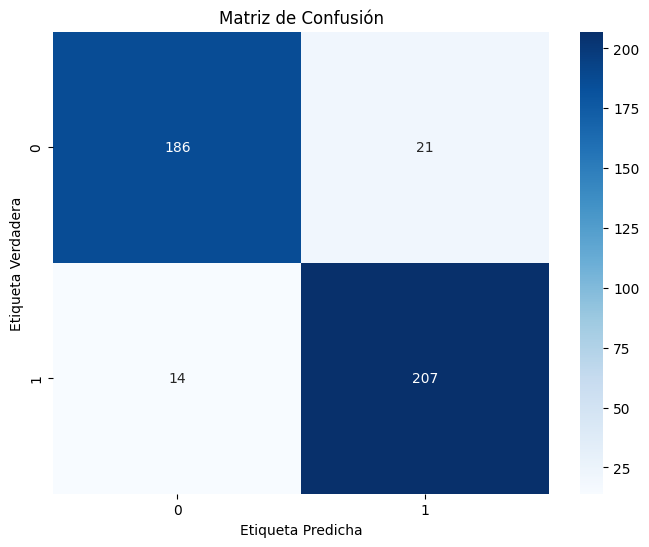

In [ ]:
# Define el rango de valores para n_neighbors
n = 50  # Supongamos un valor para n
n_neighbors_range = range(1, n)
# Inicializar variables para almacenar los 10 mejores resultados
top_10_scores = []
top_10_params = []
# Configurar y ejecutar la búsqueda de cuadrícula con validación cruzada para cada valor de n_neighbors
for n_neighbors in n_neighbors_range:
    param_grid = {
        'n_neighbors': [n_neighbors],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Obtener los mejores parámetros y la mejor puntuación
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Guardar los resultados si son uno de los 10 mejores
    if len(top_10_scores) < 10:
        top_10_scores.append(best_score)
        top_10_params.append(best_params)
    else:
        min_score_index = top_10_scores.index(min(top_10_scores))
        if best_score > top_10_scores[min_score_index]:
            top_10_scores[min_score_index] = best_score
            top_10_params[min_score_index] = best_params
# Entrenar el mejor modelo con los mejores parámetros encontrados
best_params = top_10_params[0]  # Usamos los mejores parámetros encontrados durante la búsqueda de cuadrícula
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
knn.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = knn.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

## 4)
Utiliza el clasificador para determinar qué sucede con los datos de un conjunto de pruebas "pacientes_test.csv" obtenido del conjunto de datos proporcionado.

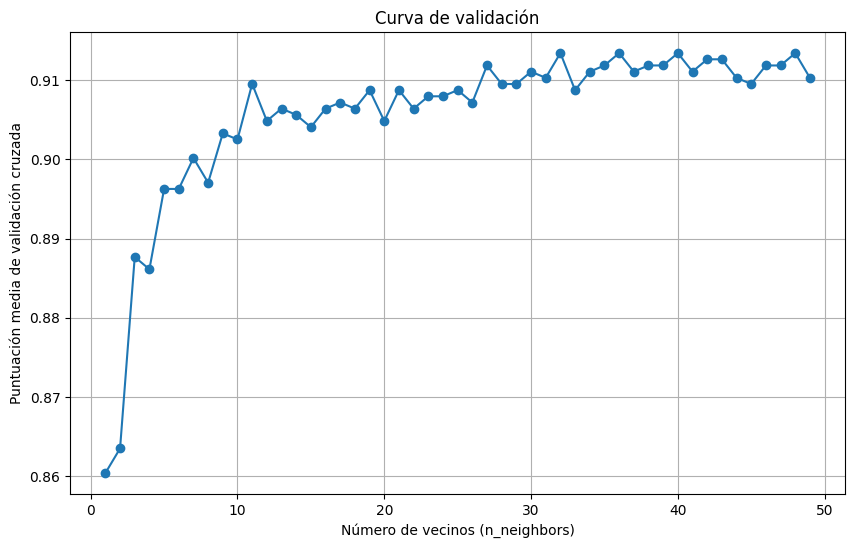

In [ ]:
# Método del codo
plt.figure(figsize=(10, 6))
# Inicializar una lista para almacenar las puntuaciones medias de validación cruzada
mean_scores = []
# Inicializar una lista para almacenar los valores de k
k_values = []
# Calcular las puntuaciones medias para cada valor de n_neighbors
for n_neighbors in n_neighbors_range:
    param_grid = {
        'n_neighbors': [n_neighbors],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    mean_scores.append(grid_search.best_score_)
    k_values.append(n_neighbors)
# Graficar los resultados
plt.plot(k_values, mean_scores, marker='o')
plt.title('Curva de validación')
plt.xlabel('Número de vecinos (n_neighbors)')
plt.ylabel('Puntuación media de validación cruzada')
plt.grid(True)
plt.show()

Cuando la precisión del modelo incrementa y después se estabiliza, esto sugiere que el modelo ha alcanzado su rendimiento óptimo en los datos de validación.

Para identificar el k óptimo en tales circunstancias, se pueden adoptar dos métodos principales:

Seleccionar el valor de k en el cual la precisión alcanza su punto máximo.
Optar por el valor de k que proporciona una buena compensación entre eficacia y complejidad del modelo. Considera el valor de k al inicio de la estabilización de la precisión, ya que esto puede ofrecer un balance adecuado entre la eficiencia y la complejidad del modelo. Un k demasiado bajo puede resultar en sobreajuste (alta varianza), y un k excesivamente alto, en subajuste (alto sesgo).
